In [ ]:
#NLP-Assignment 2
#Hall Ticket No-18K41A0574

In [ ]:
p='''paragraph is a series of sentences that are organized and coherent, and are all  related  to  a  single  topic.  Almost  every  piece  of  writing  you  do  that  is 
longer  than  a  few  sentences  should  be  organized  into  paragraphs.  This  is because paragraphs show a reader where the subdivisions of an essay begin 
and end, and thus help the reader see the organization of the essay and grasp its main points.

Paragraphs  can  contain  many  different  kinds  of  information.  A  paragraph could  contain  a  series  of  brief  examples  or  a  single  long  illustration  of  a 
general  point.  It  might  describe  a  place like kolkata,  character,  or  process;  narrate  a series of events; compare or contrast two or more things; classify items into 
categories;  or  describe  causes  and  effects.  Regardless  of  the  kind  of information they contain, all paragraphs share certain characteristics. One 
of the most important of these is a topic sentence.'''

print(p)

paragraph is a series of sentences that are organized and coherent, and are all  related  to  a  single  topic.  Almost  every  piece  of  writing  you  do  that  is 
longer  than  a  few  sentences  should  be  organized  into  paragraphs.  This  is because paragraphs show a reader where the subdivisions of an essay begin 
and end, and thus help the reader see the organization of the essay and grasp its main points.

Paragraphs  can  contain  many  different  kinds  of  information.  A  paragraph could  contain  a  series  of  brief  examples  or  a  single  long  illustration  of  a 
general  point.  It  might  describe  a  place like kolkata,  character,  or  process;  narrate  a series of events; compare or contrast two or more things; classify items into 
categories;  or  describe  causes  and  effects.  Regardless  of  the  kind  of information they contain, all paragraphs share certain characteristics. One 
of the most important of these is a topic sentence.


In [ ]:
import numpy as np
import nltk
import re
import gensim
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from gensim import corpora,models,similarities
from nltk.tokenize import PunktSentenceTokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Converting paragraph to sentences
def essay_to_sentences(paragraph):
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw_sentences = tokenizer.tokenize(paragraph.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append((raw_sentence))
    return sentences

sentences=essay_to_sentences(p)

sentences

['paragraph is a series of sentences that are organized and coherent, and are all  related  to  a  single  topic.',
 'Almost  every  piece  of  writing  you  do  that  is \nlonger  than  a  few  sentences  should  be  organized  into  paragraphs.',
 'This  is because paragraphs show a reader where the subdivisions of an essay begin \nand end, and thus help the reader see the organization of the essay and grasp its main points.',
 'Paragraphs  can  contain  many  different  kinds  of  information.',
 'A  paragraph could  contain  a  series  of  brief  examples  or  a  single  long  illustration  of  a \ngeneral  point.',
 'It  might  describe  a  place like kolkata,  character,  or  process;  narrate  a series of events; compare or contrast two or more things; classify items into \ncategories;  or  describe  causes  and  effects.',
 'Regardless  of  the  kind  of information they contain, all paragraphs share certain characteristics.',
 'One \nof the most important of these is a topic s

In [ ]:
# 1.Convert the above paragraph into vectors using:
#i)Word2Vec
wordvecs=[nltk.word_tokenize(sent) for sent in sentences]
from nltk.corpus import stopwords
nltk.download('stopwords')
stops=list(set(stopwords.words("english")))
for i in wordvecs:
  for j in i:
    if j in stops:
      i.remove(j)
    elif len(j)==1:
      i.remove(j)

model=gensim.models.Word2Vec(wordvecs,min_count=1,size=32)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#vector form of word 'paragraph'
model['paragraph']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([-0.00205376, -0.00743592, -0.00223838, -0.00182779,  0.01237929,
        0.00626491,  0.00267252, -0.01303915, -0.01412997,  0.01124691,
       -0.01419566, -0.00617927, -0.00096191, -0.00525913, -0.00048008,
        0.00056496, -0.00063607,  0.00439684, -0.00898646, -0.01351609,
        0.00920053,  0.01138118, -0.00486336,  0.01267298, -0.01546824,
       -0.00159802, -0.01427925,  0.01464149, -0.00612734, -0.01171277,
       -0.01175392,  0.00274107], dtype=float32)

In [ ]:
#Finding similar words of word 'sentence' in given paragraph
model.most_similar('sentence')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('This', 0.4368833005428314),
 ('causes', 0.42096444964408875),
 ('coherent', 0.37566155195236206),
 ('kind', 0.2886844277381897),
 ('grasp', 0.28470391035079956),
 ('points', 0.24497368931770325),
 ('contain', 0.23283201456069946),
 ('effects', 0.2209879457950592),
 ('certain', 0.21336111426353455),
 ('kinds', 0.21235862374305725)]

USE

In [ ]:
#ii)USE
import tensorflow_hub as hub
use= hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
#converting to vectors
embeddings=use(sentences)
print(embeddings)

tf.Tensor(
[[ 0.0130397  -0.02448178  0.05377616 ... -0.08659647  0.01437556
   0.04036802]
 [ 0.02902018 -0.00415597  0.07664446 ... -0.06830524 -0.00835191
   0.04397805]
 [ 0.07023076 -0.02952436  0.04878015 ... -0.06741599  0.02838855
   0.06126793]
 ...
 [ 0.04487116 -0.0484449   0.05696819 ... -0.06665879  0.03268223
   0.03346183]
 [ 0.04141247  0.0258891  -0.00625629 ... -0.0216299   0.00910816
   0.03623573]
 [ 0.00255486 -0.05832284  0.01486255 ... -0.09906971 -0.07840379
   0.06731212]], shape=(8, 512), dtype=float32)


In [ ]:
print("shape= ",embeddings[0].shape)
#Each sentence is converted into vector having 512 values
print("The sentence: ",sentences[0],"\n is converted as : \n{}".format(embeddings[0]))

shape=  (512,)
The sentence:  paragraph is a series of sentences that are organized and coherent, and are all  related  to  a  single  topic. 
 is converted as : 
[ 0.0130397  -0.02448178  0.05377616  0.09029772 -0.00281371 -0.01281828
  0.03285866  0.01635625 -0.06859536  0.06464799 -0.00420633 -0.00475263
 -0.0616823   0.02333648 -0.0740284  -0.09213066 -0.04730163  0.03868826
 -0.09117856 -0.0531873   0.0045717   0.06571639 -0.00334152  0.05408446
 -0.02477303  0.02715091 -0.02349129 -0.05725229 -0.01281677 -0.02824831
  0.08104642 -0.01898845  0.00283233 -0.01492393 -0.0671662   0.01855971
  0.05093659  0.0259113   0.01541285  0.02317855  0.01918534  0.04582307
  0.03908791  0.03328896  0.05890476  0.03568182  0.00344607 -0.05167899
 -0.03721966  0.02001154  0.00619585  0.05630827  0.00328268 -0.02715196
 -0.04551012 -0.01019349  0.01659425  0.05470299  0.0246249   0.02216954
 -0.00490041 -0.03435751  0.05740487  0.06339793  0.05196239  0.00615372
  0.04076186 -0.02079652  0.060018

In [ ]:
#iii)sentence-BERT
bert = hub.KerasLayer("https://tfhub.dev/google/nnlm-en-dim128/2")
embeddings2=bert(sentences)
print(embeddings2)

tf.Tensor(
[[ 0.5779494   0.02082791  0.09225276 ...  0.1423439   0.0289949
  -0.15707761]
 [ 0.5166956   0.00863559  0.13047293 ...  0.06873029  0.04432377
   0.02298209]
 [ 0.7741569   0.20155099 -0.06426485 ... -0.15599789  0.10988081
   0.10273374]
 ...
 [ 0.49916965 -0.00334622  0.08184471 ...  0.05571959 -0.09832127
  -0.04315813]
 [ 0.2909918   0.06627773  0.08403497 ... -0.10017543 -0.11646989
   0.00867226]
 [ 0.3799187  -0.05745781  0.09742597 ...  0.0461409  -0.07855327
   0.03973798]], shape=(8, 128), dtype=float32)


In [ ]:
print("shape=",embeddings2[0].shape)
#Each sentence is converted into vector
print("The sentence: ",sentences[0],"\n is converted as : \n{}".format(embeddings2[0]))

shape= (128,)
The sentence:  paragraph is a series of sentences that are organized and coherent, and are all  related  to  a  single  topic. 
 is converted as : 
[ 5.77949405e-01  2.08279062e-02  9.22527611e-02  4.76201549e-02
 -1.17820695e-04 -7.91035891e-02 -9.09532905e-02 -1.96999479e-02
 -1.82167172e-01  1.82781354e-01  1.78407803e-02 -1.36595681e-01
 -1.20970421e-01  3.03527750e-02 -1.55288994e-01 -3.65624130e-02
 -8.87916684e-02  1.18960990e-02 -2.42571995e-01  1.40147313e-01
  6.29373714e-02  1.13711674e-02  2.64876569e-03 -7.81569928e-02
  5.36865816e-02 -9.01894644e-02 -6.66456744e-02 -4.82053608e-02
 -3.14572081e-02  3.31105255e-02  2.45857425e-03 -5.02937846e-02
 -4.58035916e-02 -2.23965168e-01 -1.51718352e-02 -2.75546517e-02
  5.16168959e-02 -1.21403374e-01 -2.82064285e-02  2.14980636e-02
  9.37252939e-02 -7.97212273e-02  2.16491118e-01 -4.78220843e-02
 -5.53186908e-02  1.48325905e-01  1.11704050e-02 -1.39561430e-01
 -8.59184787e-02 -3.15666497e-02 -7.05443416e-03 -1.229588

In [ ]:
iv)ELMO
!pip install "tensorflow>=2.0.0"
!pip install --upgrade tensorflow-hub

In [ ]:
import tensorflow_hub as hub
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
#1024 sized vectors
elmo=hub.Module("https://tfhub.dev/google/elmo/3",trainable=True)
embeddings=elmo(
    sentences,
    signature="default",
    as_dict=True)["elmo"]
init=tf.initialize_all_variables()
sess=tf.Session()
sess.run(init)
print("\n\n")
print(sess.run(embeddings[0]))
print("shape=",embeddings[0].shape)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.





[[ 0.12622021  0.43023553  0.4043871  ...  0.22031897  0.26976916
   0.46307242]
 [-0.0062146   0.333897    0.10469673 ... -0.6755089   0.25390008
   0.654027  ]
 [ 0.00899898  0.4038667   0.13564664 ... -0.04539599  0.19543737
  -0.34905794]
 ...
 [-0.02840841 -0.04353216  0.04130163 ...  0.02583168 -0.01429836
  -0.01650422]
 [-0.02840841 -0.04353216  0.04130163 ...  0.02583168 -0.01429836
  -0.01650422]
 [-0.02840841 -0.04353216  0.04130163 ...  0.02583168 -0.01429836
  -0.01650422]]
shape= (32, 1024)


In [ ]:
v)GP2
import torch
import transformers

In [ ]:
gptokenizer=transformers.GPT2Tokenizer.from_pretrained('gpt2-large')
model=transformers.GPT2LMHeadModel.from_pretrained('gpt2-large')
output=gptokenizer.encode(p,add_special_tokens=False,return_tensors="pt")

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/666 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.02G [00:00<?, ?B/s]

In [ ]:
print("shape=",output.shape)
output

shape= torch.Size([1, 256])


tensor([[20360,   318,   257,  2168,   286, 13439,   326,   389,  8389,   290,
         24870,    11,   290,   389,   477,   220,  3519,   220,   284,   220,
           257,   220,  2060,   220,  7243,    13,   220, 16699,   220,   790,
           220,  3704,   220,   286,   220,  3597,   220,   345,   220,   466,
           220,   326,   220,   318,   220,   198,  6511,   263,   220,   621,
           220,   257,   220,  1178,   220, 13439,   220,   815,   220,   307,
           220,  8389,   220,   656,   220, 23549,    13,   220,   770,   220,
           318,   780, 23549,   905,   257,  9173,   810,   262, 45944,  3279,
           286,   281, 14268,  2221,   220,   198,   392,   886,    11,   290,
          4145,  1037,   262,  9173,   766,   262,  4009,   286,   262, 14268,
           290, 13180,   663,  1388,  2173,    13,   198,   198, 10044,  6111,
            82,   220,   460,   220,  3994,   220,   867,   220,  1180,   220,
          6982,   220,   286,   220,  1321,    13,  

In [ ]:
#2.Find named entities (NER) for the above paragraph?
import spacy
from spacy import displacy
ner=spacy.load('en')
result=ner(p)

for word in result.ents:
  print(word.text,word.label_)

kolkata PERSON
two CARDINAL
One CARDINAL


In [ ]:
spacy.explain('GPE')

'Countries, cities, states'

In [ ]:
#For better visualisation of entity recognition
displacy.render(result,style="ent",jupyter=True)

In [ ]:
#Finding named entities of another paragraph
resultss=ner("Cricket was introduced to India by British sailors in the 18th century, and the first cricket club was established in 1792. India's national cricket team did not play its first Test match until 25 June 1932 at Lord's, becoming the sixth team to be granted test cricket status. From 1932 India had to wait until 1952, almost 20 years for its first Test victory. In its first fifty years of international cricket, India didn't gain much success, winning only 35 of the first 196 Test matches it played. The team, however, gained strength in the 1970s with the emergence of players like Gavaskar, Viswanath, Kapil Dev, and the Indian spin quartet.")
for word in resultss.ents:
  print(word.text,word.label_)

India GPE
British NORP
the 18th century DATE
first ORDINAL
1792 DATE
India GPE
first ORDINAL
25 June 1932 DATE
sixth ORDINAL
1932 DATE
India GPE
1952 DATE
almost 20 years DATE
first ORDINAL
its first fifty years DATE
India GPE
only 35 CARDINAL
first ORDINAL
196 CARDINAL
the 1970s DATE
Gavaskar PERSON
Viswanath ORG
Kapil Dev PERSON
Indian NORP


In [ ]:
#Better visualisation of entity recognition
displacy.render(resultss,style="ent",jupyter=True)

In [ ]:
#3.Find similar sentences(repeated sentences) from the above paragraph?
pip install -U sentence-transformers

     |████████████████████████████████| 78 kB 3.6 MB/s 
     |████████████████████████████████| 1.2 MB 11.2 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=3df3096f7feb1448b13d8eb5f7e394878d8e5bebf9e608f0a184b00d15596500
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
se_embeddings = sbert_model.encode(sentences)
q1_vec= sbert_model.encode(sentences[0])

#cosine similarity function
#identifies similarity between 2 sentences
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

for sent in sentences:
  sim = cosine(q1_vec, sbert_model.encode([sent])[0])
  #if similarity ==1 => repeated sentence
  #if similarity > 0.6 => similar sentence
  if sim>0.6:
    print("Sentence1 =",sentences[0],"\n \nSentence2=", sent, "\n\nsimilarity = ", sim,end="\n ----------------------------- \n")

Sentence1 = paragraph is a series of sentences that are organized and coherent, and are all  related  to  a  single  topic. 
 
Sentence2= paragraph is a series of sentences that are organized and coherent, and are all  related  to  a  single  topic. 

similarity =  1.0
 ----------------------------- 
Sentence1 = paragraph is a series of sentences that are organized and coherent, and are all  related  to  a  single  topic. 
 
Sentence2= Almost  every  piece  of  writing  you  do  that  is 
longer  than  a  few  sentences  should  be  organized  into  paragraphs. 

similarity =  0.64265954
 ----------------------------- 
Sentence1 = paragraph is a series of sentences that are organized and coherent, and are all  related  to  a  single  topic. 
 
Sentence2= A  paragraph could  contain  a  series  of  brief  examples  or  a  single  long  illustration  of  a 
general  point. 

similarity =  0.6779764
 ----------------------------- 
Sentence1 = paragraph is a series of sentences that are or

#4. Explain POS tagging with HMM?

Parts of Speech (POS) tagging is a text processing technique to correctly understand the meaning of a text. POS tagging is the process of assigning the correct POS marker (noun, pronoun, adverb, etc.) to each word in an input text. We discuss POS tagging using Hidden Markov Models (HMMs) which are probabilistic sequence models.


Given a sequence (words, letters, sentences, etc.), HMMs compute a probability distribution over a sequence of labels and predict the best label sequence. POS tagging is an underlying method used in conversational systems to process natural language input. Conversational systems in a safety-critical domain such as healthcare have found to be error-prone in processing natural language. Some of these errors may cause the system to respond in an unsafe manner which might be harmful to the patients.


<b>Part-of-Speech Tagging</b>

Part-of-Speech (POS) (noun, verb, and preposition) can help in understanding the meaning of a text by identifying how different words are used in a sentence. POS can reveal a lot of information about neighbouring words and syntactic structure of a sentence. POS tagging is the process of assigning a POS marker (noun, verb, etc.) to each word in an input text. The input to a POS tagging algorithm is a sequence of tokenized words and a tag set (all possible POS tags) and the output is a sequence of tags, one per token. Words in the English language are ambiguous because they have multiple POS. For example, a book can be a verb (book a flight for me) or a noun (please give me this book). POS tagging aims to resolve those ambiguities.

There are various common tagsets for the English language that are used in labelling many corpora. 45-tag Penn Treebank tagset is one such important tagset [1]. This tagset also defines tags for special characters and punctuation apart from other POS tags. The Brown, WSJ, and Switchboard are the three most used tagged corpora for the English language. The Brown corpus consists of a million words of samples taken from 500 written texts in the United States in 1961. The WSJ corpus contains one million words published in the Wall Street Journal in 1989. The Switchboard corpus has twice as many words as Brown corpus. The source of these words is recorded phone conversations between 1990 and 1991. For tagging words from multiple languages, tagset from Nivre et al. [2] is used which is called the Universal POS tagset. This tagset is part of the Universal Dependencies project and contains 16 tags and various features to accommodate different languages. The main application of POS tagging is in sentence parsing, word disambiguation, sentiment analysis, question answering and Named Entity Recognition (NER).

<b>Hidden Markov Models</b>

The Hidden Markov Models (HMM) is a statistical model for modelling generative sequences characterized by an underlying process generating an observable sequence. HMMs have various applications such as in speech recognition, signal processing, and some low-level NLP tasks such as POS tagging, phrase chunking, and extracting information from documents. HMMs are also used in converting speech to text in speech recognition. HMMs are based on Markov chains. A Markov chain is a model that describes a sequence of potential events in which the probability of an event is dependant only on the state which is attained in the previous event. Markov model is based on a Markov assumption in predicting the probability of a sequence. If state variables are defined as q_1, q_2, \ldots, q_i  a Markov assumption is defined as (1) [3]:


(1) \begin{equation*} \text{Markov Assumption:}\,P(q_i=a|q_i \ldots q_{i-1})=P(q_i=a|q_{i-1}) \end{equation*}


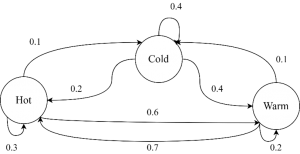


Figure 1. A Markov chain with states and transitions

Figure 1 shows an example of a Markov chain for assigning a probability to a sequence of weather events. The states are represented by nodes in the graph while edges represent the transition between states with probabilities. A first-order HMM is based on two assumptions. One of them is Markov assumption, that is the probability of a state depends only on the previous state as described earlier, the other is the probability of an output observation o_i depends only on the state that produced the observation q_i and not on any other states or observations (2) [3].


(2) \begin{equation*} \text{Output Independence:}\,P(o_i|q_1 \ldots q_i,\ldots q_t,o_1 \ldots o_i,\ldots o_T) \end{equation*}

An HMM consists of two components, the A and the B probabilities. The A matrix contains the tag transition probabilities P(t_i \vee t_{i-1}) and B the emission probabilities P(w_i \vee t_i) where w denotes the word and t denotes the tag. The transition probability, given a tag, how often is this tag is followed by the second tag in the corpus is calculated as (3):


(3) \begin{equation*} P(t_i|t_{i-1})=\frac{C(t_{i-1},t_i)}{C(t_{i-1})} \end{equation*}

The emission probability, given a tag, how likely it will be associated with a word is given by (4):


(4) \begin{equation*} P(w_i|t_i)=\frac{C(t_i,w_i)}{C(t_i)} \end{equation*}

Figure 2 shows an example of the HMM model in POS tagging. For a given sequence of three words, “word1”, “word2”, and “word3”, the HMM model tries to decode their correct POS tag from “N”, “M”, and “V”. The A transition probabilities of a state to move from one state to another and B emission probabilities that how likely a word is either N, M, or V in the given example.


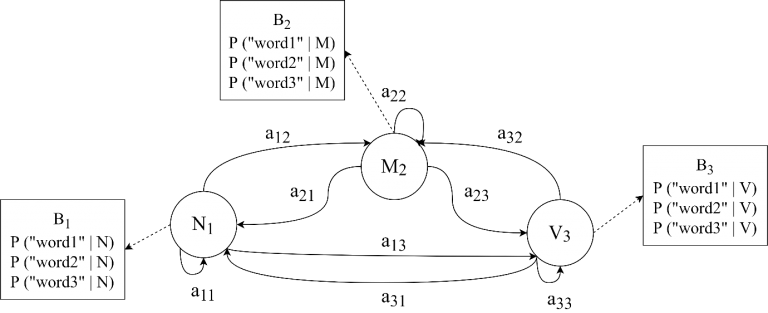


Figure 2. A Hidden Markov Model with A transition and B emission probabilities.

<b>HMM Tagger</b>

The process of determining hidden states to their corresponding sequence is known as decoding. More formally, given A, B probability matrices and a sequence of observations O=o_1 \ldots o_2, \ldots o_T, the goal of an HMM tagger is to find a sequence of states Q=q_1 \ldots q_2, \ldots q_T. For POS tagging the task is to find a tag sequence t^{n}_{1} that maximizes the probability of a sequence of observations of n words w^{n}_{1} (5).


(5) \begin{equation*} t^{n}_{1} = \max_{t^n_1} P(t^n_1 | w^n_1) \approx \max_{t^n_1} \prod^n_{i=1} P(w_i | t_i) P(t_i | t_{i-1}) \end{equation*}

<b>The Viterbi Algorithm</b>


The decoding algorithm for the HMM model is the Viterbi Algorithm. The algorithm works as setting up a probability matrix with all observations o_t in a single column and one row for each state q_i. A cell in the matrix v_t(j) represents the probability of being in state j after first t observations and passing through the highest probability sequence given A and B probability matrices. Each cell value is computed by the following equation (6):


(6) \begin{equation*} v_t(j) = \max_{q_1 \dots q_{t-1}} P(q_1 \dots q_{t-1}, o_1, o_2 \dots o_t, q_t = j | (A,B) ) \end{equation*}

Figure 3 shows an example of a Viterbi matrix with states (POS tags) and a sequence of words. A greyed state represents zero probability of word sequence from the B matrix of emission probabilities. Highlighted arrows show word sequence with correct tags having the highest probabilities through the hidden states.


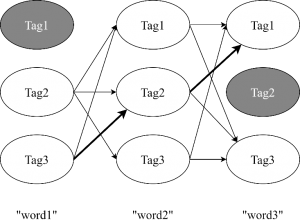


Figure 3. Viterbi matrix with possible tags for each word.

The Viterbi algorithm works recursively to compute each cell value. For a given state q_j at time t, the Viterbi probability at time t, v_t(j) is calculated as (7):


(7) \begin{equation*} v_t(j)=\text{max}^{n}_{i=1}\,v_{t-1}(i)a_{ij}b_j(o_t) \end{equation*}

The components used to multiply to get the Viterbi probability are the previous Viterbi path probability from the previous time v_{t-1}(i), a_{ij} the transition probability from the previous state q_i to current state q_j, and b_j(o_t) the state observation likelihood of the observation symbol o_t given the current state j.

<b>Conclusion</b>

In this, we discussed POS tagging, a text processing technique to extract the relationship between neighbouring words in a sentence. POS tagging resolves ambiguities for machines to understand natural language. In conversational systems, a large number of errors arise from natural language understanding (NLU) module. POS tagging is one technique to minimize those errors in conversational systems. These systems in safety-critical industries such as healthcare may have safety implications due to errors in understanding natural language and may cause harm to patients.